## Data Preprocessing

### Import all the required libraries

In [104]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, SpatialDropout1D
import matplotlib.pyplot as plt

### Import and read the dataset

In [105]:
data = pd.read_csv("Tweets.csv")

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Check the 'text' and 'airline_sentiment' column

In [106]:
reviews = data[['text', 'airline_sentiment']]

reviews.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Remove the neutral review rows

In [107]:
reviews = reviews[reviews['airline_sentiment'] != 'neutral']

reviews.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


### Check the values of the 'airline_sentiment' column

In [108]:
reviews['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

### Convert the categorical values to numeric values

In [109]:
sentiment_label = reviews.airline_sentiment.factorize()

sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

### Retrieve all the text data from the dataset

In [110]:
tweet = reviews.text.values

### Tokenize (break down into small parts) all the words in the text

In [111]:
tokenizer = Tokenizer(num_words = 5000)

tokenizer.fit_on_texts(tweet)

vocab_size = len(tokenizer.word_index) + 1

### Replace the words with their assigned numbers

In [112]:
encoded_doc = tokenizer.texts_to_sequences(tweet)

### Use padding to pad the sentences to have equal length

In [113]:
padded_sequence = pad_sequences(encoded_doc, maxlen = 200)

## Build the Text Classifier

In [114]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length = 200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout = 0.5, recurrent_dropout = 0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
________________________________________________

## Train the sentiment analysis model

In [115]:
history = model.fit(padded_sequence, sentiment_label[0], validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 87s 274ms/step - loss: 0.4075 - accuracy: 0.8303 - val_loss: 0.2064 - val_accuracy: 0.9212
Epoch 2/5
289/289 [==============================] - 79s 273ms/step - loss: 0.2168 - accuracy: 0.9164 - val_loss: 0.1666 - val_accuracy: 0.9428
Epoch 3/5
289/289 [==============================] - 83s 288ms/step - loss: 0.1623 - accuracy: 0.9407 - val_loss: 0.1566 - val_accuracy: 0.9437
Epoch 4/5
289/289 [==============================] - 81s 282ms/step - loss: 0.1315 - accuracy: 0.9511 - val_loss: 0.1634 - val_accuracy: 0.9480
Epoch 5/5
289/289 [==============================] - 75s 259ms/step - loss: 0.1101 - accuracy: 0.9606 - val_loss: 0.1817 - val_accuracy: 0.9428


### The model obtained 96.06% accuracy on the training set and 94.28% accuracy on the test set

### Plot these metrics

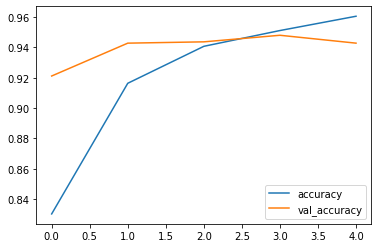

In [116]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

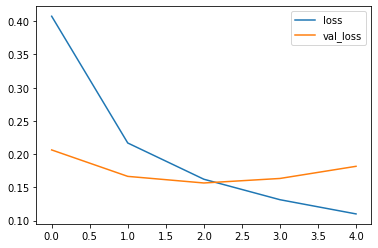

In [117]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

## Execute sentiment analysis model

In [121]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen = 200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted Sentiment: ", sentiment_label[1][prediction])

test1 = "I liked the service provided by the airline."
predict_sentiment(test1)

test2 = "I got the worst service!"
predict_sentiment(test2)

1/1 [==============================] - 0s 75ms/step
Predicted Sentiment:  positive
1/1 [==============================] - 0s 66ms/step
Predicted Sentiment:  negative
